In [7]:
# ==================== CHECK EXISTING FILES ====================
print(" Checking existing files in Google Drive...")

from google.colab import drive
import os

drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/DeepLearningProject/'

# List all files in the folder
if os.path.exists(drive_path):
    files = os.listdir(drive_path)
    print(" Files found:")
    for file in files:
        print(f"   - {file}")
else:
    print(" Folder not found")
    files = []

 Checking existing files in Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Files found:
   - unzipped_data
   - dense_model_predictions.csv
   - gru_model_predictions.csv
   - cnn_model_predictions.csv
   - lstm_model_predictions.csv


Loading data and models for evaluation...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1. Loading Dense model predictions...
 Dense model loaded successfully
   Samples: 547
   MAE:  0.0199
   R²:   0.9332

2. Loading other models for comparison...
LSTM Regression loaded: MAE=0.0358, R²=0.9916
CNN loaded: MAE=0.0187, R²=0.2138
Linear Regression results not found

3. Loading GRU Classification model...
GRU Classification loaded: Accuracy=0.8351
Classes: [0 1 2]

FINAL MODEL COMPARISON:

--- REGRESSION MODELS ---

DENSE MODEL:
  MAE:  0.0199
  R²:   0.9332

LSTM:
  MAE:  0.0358
  R²:   0.9916
 BEST R² (Regression)

CNN:
  MAE:  0.0187
  R²:   0.2138
 BEST MAE (Regression)

--- CLASSIFICATION MODELS ---

GRU CLASSIFICATION:
  Accuracy: 0.8351
  Precision: 0.8387
  Recall:    0.8351
  F1-Score:  0.8351
 BEST Accuracy

 OVERALL SUMMARY:
  Best Regression R²:  LSTM (0.9916)
  Best Regression MAE: CNN (0.0187)

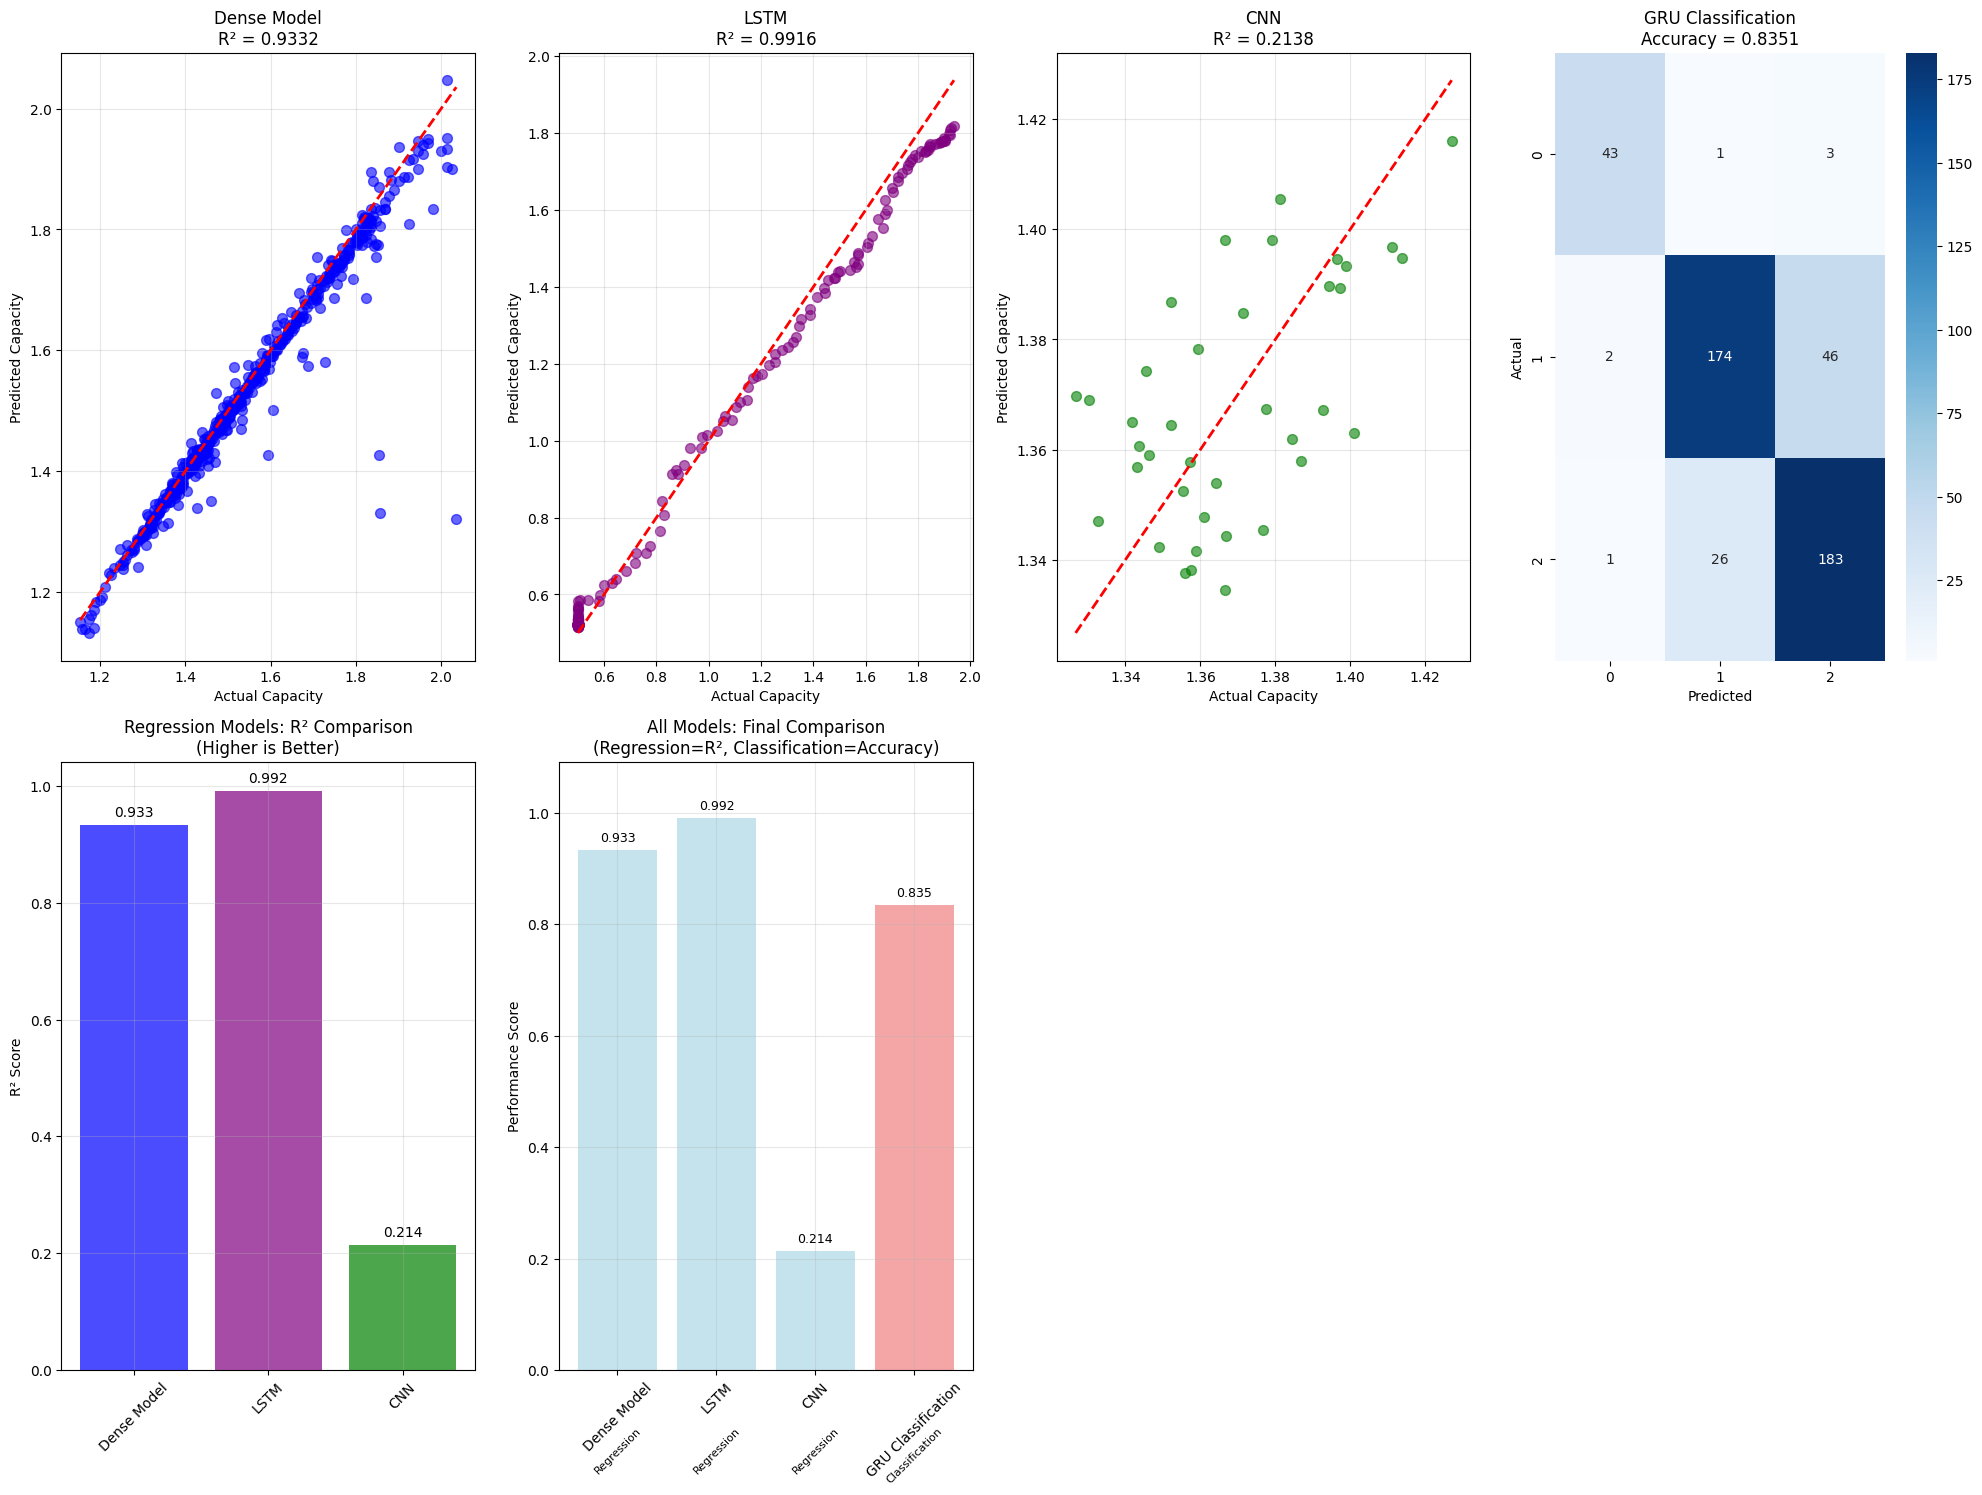


DETAILED PERFORMANCE STATISTICS:

Regression Models: 3
  R² Range:  0.2138 - 0.9916
  MAE Range: 0.0187 - 0.0358

Classification Models: 1
  Accuracy Range: 0.8351 - 0.8351

Total Models Compared: 4

 MODEL EVALUATION COMPLETED!


In [8]:
# ==================== EVALUATION FOR NEW SESSION ====================
print("Loading data and models for evaluation...")

from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/DeepLearningProject/'

# ==================== 1. LOAD DENSE MODEL PREDICTIONS ====================
print("1. Loading Dense model predictions...")

dense_results_path = drive_path + 'dense_model_predictions.csv'
if os.path.exists(dense_results_path):
    dense_results = pd.read_csv(dense_results_path)
    y_test = dense_results['actual']
    dense_predictions = dense_results['predicted']

    # Calculate Dense model metrics
    dense_mae = mean_absolute_error(y_test, dense_predictions)
    dense_rmse = np.sqrt(mean_squared_error(y_test, dense_predictions))
    dense_r2 = r2_score(y_test, dense_predictions)

    print(" Dense model loaded successfully")
    print(f"   Samples: {len(y_test)}")
    print(f"   MAE:  {dense_mae:.4f}")
    print(f"   R²:   {dense_r2:.4f}")
else:
    print(" Dense model results not found!")
    # Exit if no dense results
    raise FileNotFoundError("Dense model predictions file not found")

# ==================== 2. LOAD AND COMPARE WITH OTHER MODELS ====================
print("\n2. Loading other models for comparison...")
regression_models = {}
classification_models = {}

# Add Dense model to regression comparison
regression_models['Dense Model'] = {
    'type': 'regression',
    'mae': dense_mae,
    'r2': dense_r2,
    'actual': y_test,
    'predicted': dense_predictions
}

# Check and load LSTM regression results
lstm_path = drive_path + 'lstm_model_predictions.csv'
if os.path.exists(lstm_path):
    lstm_results = pd.read_csv(lstm_path)
    if 'predictions' in lstm_results.columns and 'actual' in lstm_results.columns:
        lstm_actual = lstm_results['actual']
        lstm_pred = lstm_results['predictions']
    elif 'predicted' in lstm_results.columns and 'actual' in lstm_results.columns:
        lstm_actual = lstm_results['actual']
        lstm_pred = lstm_results['predicted']
    else:
        lstm_actual = lstm_results.iloc[:, 0]
        lstm_pred = lstm_results.iloc[:, 1]

    lstm_mae = mean_absolute_error(lstm_actual, lstm_pred)
    lstm_r2 = r2_score(lstm_actual, lstm_pred)
    regression_models['LSTM'] = {
        'type': 'regression',
        'mae': lstm_mae,
        'r2': lstm_r2,
        'actual': lstm_actual,
        'predicted': lstm_pred
    }
    print(f"LSTM Regression loaded: MAE={lstm_mae:.4f}, R²={lstm_r2:.4f}")
else:
    print("LSTM regression results not found!")

# Check and load CNN results
cnn_path = drive_path + 'cnn_model_predictions.csv'
if os.path.exists(cnn_path):
    cnn_results = pd.read_csv(cnn_path)
    cnn_mae = mean_absolute_error(cnn_results['actual'], cnn_results['predicted'])
    cnn_r2 = r2_score(cnn_results['actual'], cnn_results['predicted'])
    regression_models['CNN'] = {
        'type': 'regression',
        'mae': cnn_mae,
        'r2': cnn_r2,
        'actual': cnn_results['actual'],
        'predicted': cnn_results['predicted']
    }
    print(f"CNN loaded: MAE={cnn_mae:.4f}, R²={cnn_r2:.4f}")
else:
    print("CNN results not found!")

# Check for Linear Regression results
lr_path = drive_path + 'linear_regression_predictions.csv'
if os.path.exists(lr_path):
    lr_results = pd.read_csv(lr_path)
    lr_mae = mean_absolute_error(lr_results['actual'], lr_results['predicted'])
    lr_r2 = r2_score(lr_results['actual'], lr_results['predicted'])
    regression_models['Linear Regression'] = {
        'type': 'regression',
        'mae': lr_mae,
        'r2': lr_r2,
        'actual': lr_results['actual'],
        'predicted': lr_results['predicted']
    }
    print(f"Linear Regression loaded: MAE={lr_mae:.4f}, R²={lr_r2:.4f}")
else:
    print("Linear Regression results not found")

# ==================== 3. LOAD GRU CLASSIFICATION MODEL ====================
print("\n3. Loading GRU Classification model...")

gru_classification_path = drive_path + 'gru_model_predictions.csv'
if os.path.exists(gru_classification_path):
    gru_results = pd.read_csv(gru_classification_path)

    # Handle different possible column names for classification
    if 'actual_class' in gru_results.columns and 'predicted_class' in gru_results.columns:
        gru_actual = gru_results['actual_class']
        gru_pred = gru_results['predicted_class']
    elif 'true_labels' in gru_results.columns and 'predictions' in gru_results.columns:
        gru_actual = gru_results['true_labels']
        gru_pred = gru_results['predictions']
    else:
        # Use first two columns
        gru_actual = gru_results.iloc[:, 0]
        gru_pred = gru_results.iloc[:, 1]

    # Calculate classification metrics
    gru_accuracy = accuracy_score(gru_actual, gru_pred)
    classification_report_dict = classification_report(gru_actual, gru_pred, output_dict=True)

    classification_models['GRU Classification'] = {
        'type': 'classification',
        'accuracy': gru_accuracy,
        'actual': gru_actual,
        'predicted': gru_pred,
        'classification_report': classification_report_dict
    }
    print(f"GRU Classification loaded: Accuracy={gru_accuracy:.4f}")
    print(f"Classes: {np.unique(gru_actual)}")
else:
    print("GRU Classification results not found!")

# ==================== 4. COMPARE ALL MODELS ====================
print("\n" + "="*70)
print("FINAL MODEL COMPARISON:")
print("="*70)

# Compare regression models
if regression_models:
    print("\n--- REGRESSION MODELS ---")
    best_r2_model = max(regression_models.items(), key=lambda x: x[1]['r2'])
    best_mae_model = min(regression_models.items(), key=lambda x: x[1]['mae'])

    for model_name, metrics in regression_models.items():
        print(f"\n{model_name.upper()}:")
        print(f"  MAE:  {metrics['mae']:.4f}")
        print(f"  R²:   {metrics['r2']:.4f}")

        if model_name == best_mae_model[0]:
            print(f" BEST MAE (Regression)")
        if model_name == best_r2_model[0]:
            print(f" BEST R² (Regression)")

# Compare classification models
if classification_models:
    print("\n--- CLASSIFICATION MODELS ---")
    best_acc_model = max(classification_models.items(), key=lambda x: x[1]['accuracy'])

    for model_name, metrics in classification_models.items():
        print(f"\n{model_name.upper()}:")
        print(f"  Accuracy: {metrics['accuracy']:.4f}")

        # Show additional classification metrics if available
        if 'classification_report' in metrics:
            report = metrics['classification_report']
            if 'weighted avg' in report:
                print(f"  Precision: {report['weighted avg']['precision']:.4f}")
                print(f"  Recall:    {report['weighted avg']['recall']:.4f}")
                print(f"  F1-Score:  {report['weighted avg']['f1-score']:.4f}")

        if model_name == best_acc_model[0]:
            print(f" BEST Accuracy")

print(f"\n OVERALL SUMMARY:")
if regression_models:
    best_reg_r2 = max(regression_models.items(), key=lambda x: x[1]['r2'])
    best_reg_mae = min(regression_models.items(), key=lambda x: x[1]['mae'])
    print(f"  Best Regression R²:  {best_reg_r2[0]} ({best_reg_r2[1]['r2']:.4f})")
    print(f"  Best Regression MAE: {best_reg_mae[0]} ({best_reg_mae[1]['mae']:.4f})")

if classification_models:
    best_clf_acc = max(classification_models.items(), key=lambda x: x[1]['accuracy'])
    print(f"  Best Classification Accuracy: {best_clf_acc[0]} ({best_clf_acc[1]['accuracy']:.4f})")

# ==================== 5. CREATE COMPREHENSIVE VISUALIZATION ====================
print("\n Creating comprehensive visualization...")

# Determine layout based on available models
num_regression = len(regression_models)
num_classification = len(classification_models)
total_plots = num_regression + num_classification + 2  # +2 for comparison plots

plt.figure(figsize=(20, 5 * ((total_plots + 1) // 2)))

plot_idx = 1

# Plot regression models
for model_name, metrics in regression_models.items():
    plt.subplot(2, 4, plot_idx)
    plt.scatter(metrics['actual'], metrics['predicted'], alpha=0.6,
                color=['blue', 'purple', 'green', 'orange'][plot_idx-1], s=50)
    plt.plot([metrics['actual'].min(), metrics['actual'].max()],
             [metrics['actual'].min(), metrics['actual'].max()], 'r--', linewidth=2)
    plt.xlabel('Actual Capacity')
    plt.ylabel('Predicted Capacity')
    plt.title(f'{model_name}\nR² = {metrics["r2"]:.4f}')
    plt.grid(True, alpha=0.3)
    plot_idx += 1

# Plot classification model (if available)
if classification_models:
    for model_name, metrics in classification_models.items():
        plt.subplot(2, 4, plot_idx)

        # Create confusion matrix heatmap
        cm = confusion_matrix(metrics['actual'], metrics['predicted'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=np.unique(metrics['actual']),
                   yticklabels=np.unique(metrics['actual']))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{model_name}\nAccuracy = {metrics["accuracy"]:.4f}')
        plot_idx += 1

# Regression metrics comparison
plt.subplot(2, 4, plot_idx)
if regression_models:
    models = list(regression_models.keys())
    r2_scores = [regression_models[m]['r2'] for m in models]
    colors = ['blue', 'purple', 'green', 'orange'][:len(models)]

    bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
    plt.ylabel('R² Score')
    plt.title('Regression Models: R² Comparison\n(Higher is Better)')
    plt.xticks(rotation=45)

    for bar, score in zip(bars, r2_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.3f}', ha='center', va='bottom')
    plt.grid(True, alpha=0.3)
plot_idx += 1

# Final comparison plot (Accuracy for classification, R² for regression)
plt.subplot(2, 4, plot_idx)
all_models = {}
model_types = {}

# Add regression models with R² scores
for name, metrics in regression_models.items():
    all_models[name] = metrics['r2']
    model_types[name] = 'Regression (R²)'

# Add classification models with accuracy scores
for name, metrics in classification_models.items():
    all_models[name] = metrics['accuracy']
    model_types[name] = 'Classification (Accuracy)'

if all_models:
    models = list(all_models.keys())
    scores = list(all_models.values())
    types = [model_types[m] for m in models]

    # Color by model type
    colors = ['lightblue' if 'Regression' in t else 'lightcoral' for t in types]

    bars = plt.bar(models, scores, color=colors, alpha=0.7)
    plt.ylabel('Performance Score')
    plt.title('All Models: Final Comparison\n(Regression=R², Classification=Accuracy)')
    plt.xticks(rotation=45)

    # Add value labels and type labels
    for bar, score, model_type in zip(bars, scores, types):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.3f}', ha='center', va='bottom', fontsize=9)
        # Add type label at bottom
        plt.text(bar.get_x() + bar.get_width()/2, -0.1,
                 model_type.split('(')[0].strip(), ha='center', va='top',
                 fontsize=8, rotation=45)

    plt.grid(True, alpha=0.3)
    plt.ylim(0, max(scores) + 0.1)

plt.tight_layout()
plt.show()

# ==================== 6. DETAILED STATISTICS ====================
print("\n" + "="*60)
print("DETAILED PERFORMANCE STATISTICS:")
print("="*60)

print(f"\nRegression Models: {len(regression_models)}")
if regression_models:
    r2_scores = [m['r2'] for m in regression_models.values()]
    mae_scores = [m['mae'] for m in regression_models.values()]
    print(f"  R² Range:  {min(r2_scores):.4f} - {max(r2_scores):.4f}")
    print(f"  MAE Range: {min(mae_scores):.4f} - {max(mae_scores):.4f}")

print(f"\nClassification Models: {len(classification_models)}")
if classification_models:
    acc_scores = [m['accuracy'] for m in classification_models.values()]
    print(f"  Accuracy Range: {min(acc_scores):.4f} - {max(acc_scores):.4f}")

print(f"\nTotal Models Compared: {len(regression_models) + len(classification_models)}")

print("\n MODEL EVALUATION COMPLETED!")